In [1]:
import pandas as pd

#read the music_topics csv into a pandas DataFrame
music_topics = pd.read_csv("./data/music_topics.csv", header=0)

#checking head and tail of data
print(music_topics.head())
print(music_topics.tail())



   Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadne

In [2]:
#profiling the data
print(music_topics.shape)
print(music_topics.info())
print(music_topics.describe())
print(music_topics["topic"].value_counts()["sadness"])

(28372, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64

In [3]:
#Check for duplicates
music_topics.duplicated().sum()

0

In [4]:
#get names of columns
print(music_topics.columns)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')


In [5]:
#Remove irrelevant columns (only works when put into another variable for some reason)
drop_cols = ['Unnamed: 0', 'dating', 'len', 'shake the audience', 'family/gospel', 'communication', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']
music_topics_df = music_topics.drop(labels=drop_cols, axis=1)
#print(music_topics["topic"].value_counts()["sadness"])
#verify that columns were dropped
print(music_topics_df.shape)
print(music_topics_df.columns)

(28372, 12)
Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics',
       'violence', 'world/life', 'night/time', 'romantic', 'obscene',
       'sadness', 'topic'],
      dtype='object')


In [6]:
#check for any null values 
print(music_topics_df.isnull().values.any())
print(music_topics_df.isnull().values.sum())

False
0


In [7]:
#drop rows where topic equals feelings
music_topics_df = music_topics_df.drop(music_topics_df[music_topics_df["topic"] == "feelings"].index)
print(music_topics_df.shape)

(27760, 12)


In [8]:
music_topics_df.groupby(by='topic').count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303
night/time,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
obscene,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882
romantic,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524
sadness,6096,6096,6096,6096,6096,6096,6096,6096,6096,6096,6096
violence,5710,5710,5710,5710,5710,5710,5710,5710,5710,5710,5710
world/life,5420,5420,5420,5420,5420,5420,5420,5420,5420,5420,5420


['music', 'night/time', 'obscene', 'romantic', 'sadness', 'violence', 'world/life']


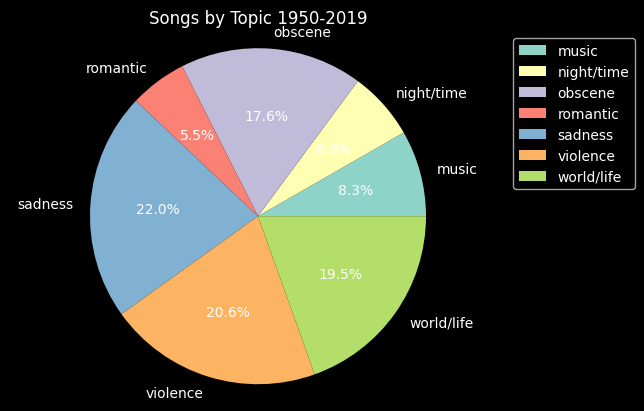

In [10]:
import matplotlib.pyplot as plt

#use unique topic values as the labels
labels = list(music_topics_df.topic.unique())
#alphabetize label list
labels.sort()
print(labels)

#found the number of entries per topic using count() and compiled into a usable list
num_topics = [2303, 1825, 4882, 1524, 6096, 5710, 5420]

#assembled a pie chart for music topics, will use as control
fig1, ax1 = plt.subplots()

ax1.pie(num_topics, labels= labels, autopct="%1.1f%%")

ax1.axis('equal')

plt.title('Songs by Topic 1950-2019')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()




In [12]:
#write the cleaned and transformed data back to a csv
music_topics_df.to_csv("./data/music_topics_cleaned.csv", encoding='utf-8', index=False)